In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [65]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

##### Pegando 2 flores diferentes para as diferenciar.

In [66]:
setosa = np.array(df.iloc[0 : 50, [0,2]])
versicolor = np.array(df.iloc[50 : 100, [0, 2]])

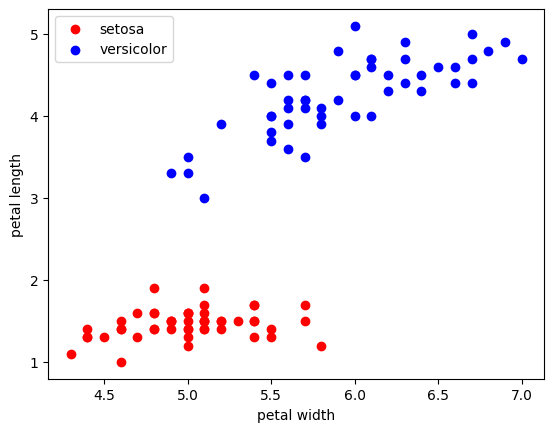

In [67]:
plt.scatter(setosa[:, 0], setosa[:, 1], color = 'red', label = 'setosa')
plt.scatter(versicolor[:, 0], versicolor[:, 1], color = 'blue', label = 'versicolor')
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.legend()
plt.show()

In [68]:
class Perceptron():
    # Inicializa os hiperparâmetros (taxa de aprendizado e número de iterações)
    def __init__(self, eta=0.1, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):      
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] # Inicializa os pesos aleatoriamente
        self.errors_ = []   # Mantém o controle do número de erros por iteração para observação

        # Itera sobre o conjunto de dados rotulado atualizando os pesos para cada característica
        for _ in range(self.n_iter):
            errors = 0
            for xi, label in zip(X, y):
                update = self.eta * (label - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    # Calcula a entrada líquida, ou seja, a soma escalar de X e os pesos mais o valor do viés
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Prevê uma classificação para uma amostra de características X
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def plot_line(self, X):
        x = []
        y = []
        slope = -(self.w_[0]/self.w_[2])/(self.w_[0]/self.w_[1])  
        intercept = -self.w_[0]/self.w_[2]
        for i in np.linspace(np.amin(X[:,0])-0.5,np.amax(X[:,0])+0.5):
            #y=mx+c, m is slope and c is intercept
            x.append(i)
            y.append((slope*i) + intercept)
        return x, y
    def step_fit(self, X, y):
        #iterate over labelled dataset updating weights for each features accordingly
        for xi, label in zip(X, y):
            update = self.eta * (label-self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
        return self

    def init_plot(self):
        self.line.set_data([],[])
        return self.line
        
    def animate(self, i, X, y):
        self.step_fit(X, y)
        x, y = self.plot_line(X)
        self.line.set_data(x, y)
        return self.line
        
    def animated_fit(self, X, y):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] #randomly initialize weights
        
        #here figure must be defined as a variable so it can be passed to FuncAnimation
        fig = plt.figure()
        
        #setting x and y limits with a 0.5 offset
        ax = plt.axes(xlim=(min(X[:,0])-0.5, max(X[:,0])+0.5), ylim=(min(X[:,1])-0.5, max(X[:,1])+0.5))
        
        #plotting our training points
        ax.plot(X[0:50, 0],X[0:50, 1], "bo", label="Iris-setosa")
        ax.plot(X[50:100, 0],X[50:100, 1], "rx", label="Versicolor")
        
        #labelling
        ax.legend(loc='upper left')

        
        #initialization of seperation line and our animation object
        self.line, = ax.plot([], [], lw=2) 
        anim = FuncAnimation(fig, self.animate, init_func=self.init_plot, fargs=(X, y,), frames=self.n_iter, interval=200, blit=True)
        anim.save('learning_process.gif', writer='imagemagick')

##### Treinando o perceptron.

In [69]:
X = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

ppn = Perceptron(n_iter=10) #initializing a new perceptron
ppn.fit(X, y) #training
ppn.w_

[-0.4488599771333759, -0.21982408501462558, 0.6415601533908857]

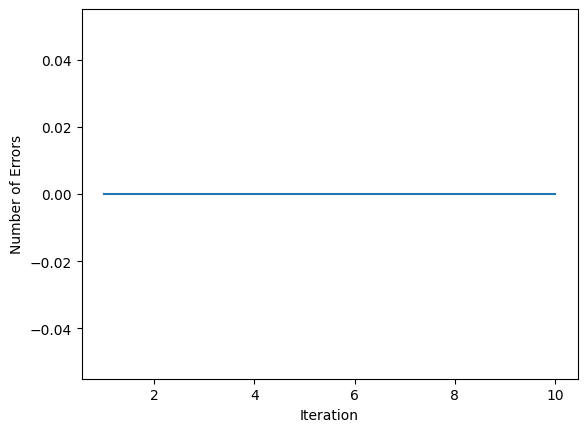

In [70]:

#plotting errors against number of iterations
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel("Iteration")
plt.ylabel("Number of Errors")

plt.show()

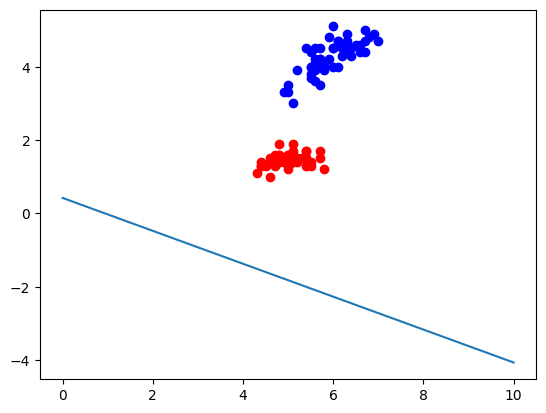

In [71]:
x_plt = np.linspace(start = 0, stop = 10, num = 1000)
plt.scatter(setosa[:, 0], setosa[:, 1], color = 'red', label = 'setosa')
plt.scatter(versicolor[:, 0], versicolor[:, 1], color = 'blue', label = 'versicolor')
y_plt = ppn.w_[0]*x_plt + ppn.w_[1] + ppn.w_[2]
plt.plot(x_plt, y_plt)
plt.show()

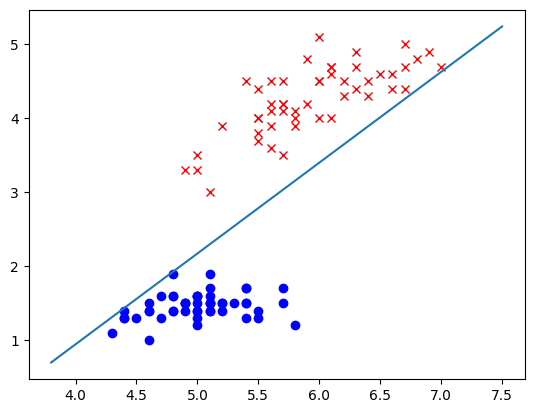

In [72]:
ppn = Perceptron(eta=0.001, n_iter=100) #initializing a new perceptron
ppn.fit(X, y) #training

x, y = ppn.plot_line(X) #get x and y points for our seperation line

#plot our training data
plt.plot(X[0:50, 0],X[0:50, 1], "bo", label="Iris-setosa")
plt.plot(X[50:100, 0],X[50:100, 1], "rx", label="Versicolor")

plt.plot(x, y) #plot seperation line
plt.show()

In [73]:
from matplotlib.animation import FuncAnimation

In [79]:
fig = plt.figure()
anim = FuncAnimation(fig, ppn.animate, init_func = ppn.init_plot, fargs=(X, y,), frames=50, interval=200, blit=True)

TypeError: 'Line2D' object is not iterable

<Figure size 640x480 with 0 Axes>

TypeError: 'Line2D' object is not iterable

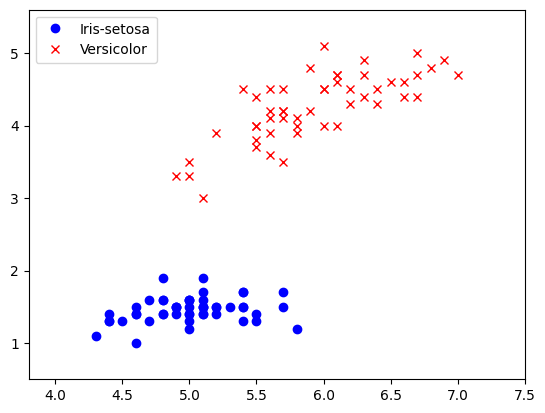

In [75]:
X = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

ppn = Perceptron(eta=0.001, n_iter=100) #initializing a new perceptron
ppn.animated_fit(X, y)